In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

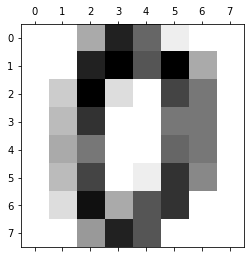

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.matshow(digits.images[0], cmap=plt.cm.gray_r)

<h4 style='color:purple'>Create and train logistic regression model</h4>

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Rahul Sojitra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<h4 style='color:purple'>Measure accuracy of our model</h4>

In [7]:
model.score(X_test, y_test)

0.9694444444444444

In [8]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

<h4 style='color:purple'>Confusion Matrix</h4>

In [9]:
y_predicted = model.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 28,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  1,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 37]], dtype=int64)

Text(69.0, 0.5, 'Truth')

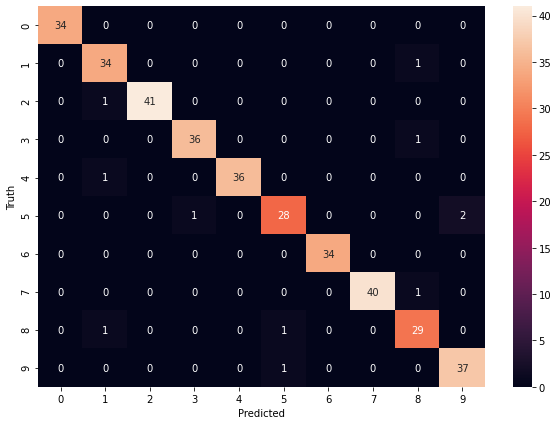

In [11]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Train and the model and prediction**

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [13]:
model.score(X_test, y_test)

0.9694444444444444

In [14]:
y_predicted = model.predict(X_test)

**Confusion Matrix**

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 40,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  1],
       [ 1,  1,  0,  0,  0,  0, 32,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  2,  0, 35]], dtype=int64)

Text(69.0, 0.5, 'Truth')

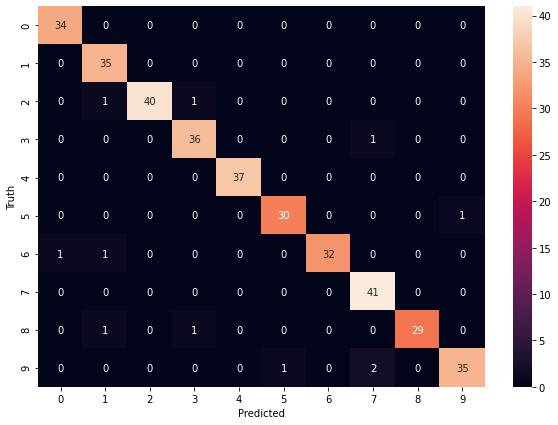

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [17]:
from sklearn.svm import SVC
import numpy as np

**Logistic Regression**

In [18]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9555555555555556

**SVM**

In [19]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.39444444444444443

**Random Forest**

In [20]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9722222222222222

<h2 style='color:purple'>KFold cross validation</h2>

**Basic example**

In [21]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [22]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


**Use KFold for our digits example**

In [23]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [24]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [25]:
scores_logistic

[0.8948247078464107, 0.9532554257095158, 0.9098497495826378]

In [26]:
scores_svm

[0.3806343906510851, 0.41068447412353926, 0.5125208681135225]

In [27]:
scores_rf

[0.9348914858096828, 0.9398998330550918, 0.9332220367278798]

<h2 style='color:purple'>cross_val_score function</h2>

In [28]:
from sklearn.model_selection import cross_val_score

**Logistic regression model performance using cross_val_score**

In [29]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)

array([0.89482471, 0.95325543, 0.90984975])

**svm model performance using cross_val_score**

In [30]:
cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)

array([0.38063439, 0.41068447, 0.51252087])

**random forest performance using cross_val_score**

In [31]:
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)

array([0.92487479, 0.95158598, 0.92487479])

cross_val_score uses stratifield kfold by default

<h2 style='color:purple'>Parameter tunning using k fold cross validation</h2>

In [32]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
np.average(scores1)

0.87756052141527

In [33]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
np.average(scores2)

0.9382433271260086

In [34]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target, cv=10)
np.average(scores3)

0.9526908752327745

In [35]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)
np.average(scores4)

0.9432371198013655

Here we used cross_val_score to
fine tune our random forest classifier and figured that having around 40 trees in random forest gives best result. 

<h2 align='center' style='color:purple'>Finding best model and hyper parameter tunning using GridSearchCV</h2>

**For digits dataset in sklearn library, we are going to find out best model and best hyper parameters using GridSearchCV**

<img src='iris_petal_sepal.png' height=300 width=300 />

**Load digits dataset**

In [36]:
from sklearn import svm, datasets
digits = load_digits()

<h3 style='color:blue'>Approach 1: Use train_test_split and manually tune parameters by trial and error</h3>

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

In [38]:
model = svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.42592592592592593

<h3 style='color:blue'>Approach 2: Use K Fold Cross validation</h3>

**Manually try suppling models with different parameters to cross_val_score function with 5 fold cross validation**

In [39]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [40]:
cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),digits.data, digits.target, cv=5)

array([0.96388889, 0.91944444, 0.96657382, 0.9637883 , 0.92479109])

In [41]:
cross_val_score(svm.SVC(kernel='rbf',C=10,gamma='auto'),digits.data, digits.target, cv=5)

array([0.45277778, 0.46944444, 0.47910864, 0.47910864, 0.50139276])

In [42]:
cross_val_score(svm.SVC(kernel='rbf',C=20,gamma='auto'),digits.data, digits.target, cv=5)

array([0.45277778, 0.46944444, 0.47910864, 0.47910864, 0.50139276])

**Above approach is tiresome and very manual. We can use for loop as an alternative**

In [43]:
kernels = ['rbf', 'linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),digits.data, digits.target, cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

avg_scores

{'rbf_1': 0.448545341999381,
 'rbf_10': 0.47636645001547506,
 'rbf_20': 0.47636645001547506,
 'linear_1': 0.9476973073351903,
 'linear_10': 0.9476973073351903,
 'linear_20': 0.9476973073351903}

**From above results we can say that linear with C=1 will give best performance**

<h3 style='color:blue'>Approach 3: Use GridSearchSV</h3>

**GridSearchCV does exactly same thing as for loop above but in a single line of code**

In [44]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(digits.data, digits.target)
clf.cv_results_

{'mean_fit_time': array([0.35328164, 0.03156576, 0.34946046, 0.03071618, 0.37088056,
        0.02932153]),
 'std_fit_time': array([0.01086599, 0.00910528, 0.00242446, 0.00145225, 0.02451788,
        0.00079788]),
 'mean_score_time': array([0.04437966, 0.00811095, 0.04229088, 0.00818181, 0.04154549,
        0.0083775 ]),
 'std_score_time': array([0.00369887, 0.00495945, 0.00048146, 0.00040133, 0.00479695,
        0.00048866]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],


In [45]:
import pandas as pd
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.353282,0.010866,0.044380,0.003699,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.411111,0.450000,0.454039,0.448468,0.479109,0.448545,0.021761,6
1,0.031566,0.009105,0.008111,0.004959,1,linear,"{'C': 1, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,1
2,0.349460,0.002424,0.042291,0.000481,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.452778,0.469444,0.479109,0.479109,0.501393,0.476366,0.015784,4
3,0.030716,0.001452,0.008182,0.000401,10,linear,"{'C': 10, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,1
4,0.370881,0.024518,0.041545,0.004797,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.452778,0.469444,0.479109,0.479109,0.501393,0.476366,0.015784,4
5,0.029322,0.000798,0.008378,0.000489,20,linear,"{'C': 20, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,1


In [46]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.448545
1,1,linear,0.947697
2,10,rbf,0.476366
3,10,linear,0.947697
4,20,rbf,0.476366
5,20,linear,0.947697


In [47]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [48]:
clf.best_score_

0.9476973073351903

**How about different models with different hyperparameters?**

In [49]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20,100],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,40]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10,50]
        }
    }
}


In [50]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(digits.data, digits.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.947697,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.932694,{'n_estimators': 40}
2,logistic_regression,0.922114,{'C': 1}


In [51]:
model_params.items()

dict_items([('svm', {'model': SVC(gamma='auto'), 'params': {'C': [1, 10, 20, 100], 'kernel': ['rbf', 'linear']}}), ('random_forest', {'model': RandomForestClassifier(), 'params': {'n_estimators': [1, 5, 10, 40]}}), ('logistic_regression', {'model': LogisticRegression(solver='liblinear'), 'params': {'C': [1, 5, 10, 50]}})])

**Based on above, I can conclude that SVM with C=1 and kernel='linear' is the best model for solving my problem of handwritten digits classification**